<a href="https://colab.research.google.com/github/penguinhouse/AIFFEL_quest_iNho/blob/main/Node_project/CR6_DL_10/DL_project_boston_reuters_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 10-2. Boston 주택 가격 예측 모델

## 데이터 로드 및 전처리

In [19]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [20]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [21]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

## 모델 구성 및 컴파일

In [22]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## 모델학습

In [23]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 1s 11ms/step - loss: 505.9928 - mae: 20.6635 - val_loss: 503.4684 - val_mae: 20.7112
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 384.3806 - mae: 17.5773 - val_loss: 359.6723 - val_mae: 17.0569
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 248.4316 - mae: 13.5193 - val_loss: 208.7923 - val_mae: 12.2542
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 127.4183 - mae: 9.0922 - val_loss: 98.6554 - val_mae: 7.6154
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 65.5200 - mae: 6.2192 - val_loss: 56.8265 - val_mae: 5.7937
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 44.9338 - mae: 5.0479 - val_loss: 43.7281 - val_mae: 4.9382
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 34.9839 - mae: 4.2682 - val_loss: 32.6484 - val_mae: 4.3975
Epoch 8/100
21/21 [==============================] - 0s

<ipython-input-24-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


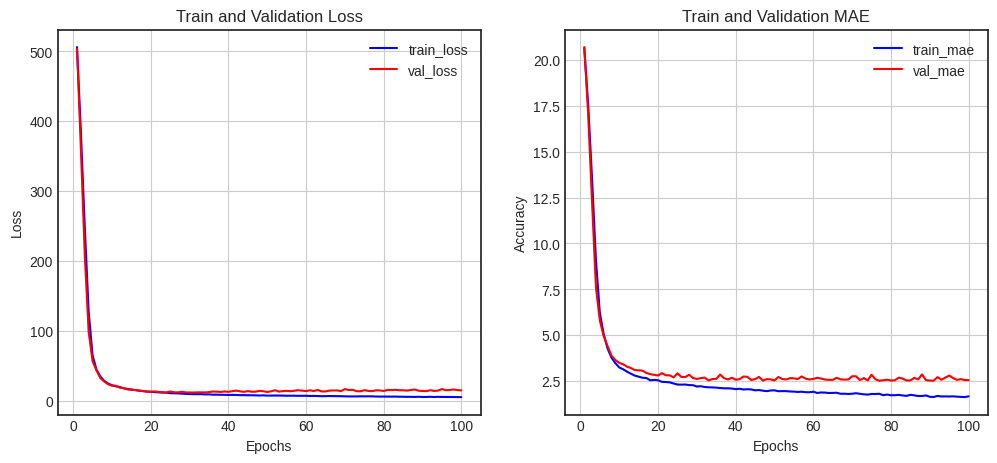

In [24]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [25]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 24.5711 - mae: 3.0182


In [26]:
test_mae_score

3.0181779861450195

## 10-3. Reuters 딥러닝 모델


## 데이터 로드 및 전처리

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [28]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, stratify=train_labels, random_state=42)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 [==============================] - 0s 0us/step
6736
2246
2246
46


In [29]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.

def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

## 모델 구성 및 컴파일

In [30]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)              

## 모델 학습

In [32]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from keras import models, layers, callbacks

# 이전 코드 (모델 컴파일)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping 추가
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', # 검증 손실 기준 선택
    patience=10, # 중지까지 기다리는 에포크 매개변수
    restore_best_weights=True, # 가장 좋은 가중치 복원 여부 설정
    verbose=1 # 진행 사항 표시
)

# 모델 학습시 콜백 추가
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping]) # 콜백 추가

Epoch 1/40
14/14 [==============================] - 3s 151ms/step - loss: 3.5022 - accuracy: 0.2645 - val_loss: 3.4614 - val_accuracy: 0.5770
Epoch 2/40
14/14 [==============================] - 2s 142ms/step - loss: 2.1150 - accuracy: 0.5606 - val_loss: 3.0353 - val_accuracy: 0.6794
Epoch 3/40
14/14 [==============================] - 1s 105ms/step - loss: 1.6049 - accuracy: 0.6731 - val_loss: 2.7128 - val_accuracy: 0.6959
Epoch 4/40
14/14 [==============================] - 1s 103ms/step - loss: 1.3175 - accuracy: 0.7306 - val_loss: 2.4556 - val_accuracy: 0.7075
Epoch 5/40
14/14 [==============================] - 1s 100ms/step - loss: 1.1428 - accuracy: 0.7598 - val_loss: 2.2688 - val_accuracy: 0.7199
Epoch 6/40
14/14 [==============================] - 1s 91ms/step - loss: 0.9815 - accuracy: 0.7885 - val_loss: 2.1159 - val_accuracy: 0.7235
Epoch 7/40
14/14 [==============================] - 1s 89ms/step - loss: 0.8665 - accuracy: 0.8156 - val_loss: 1.9908 - val_accuracy: 0.7182
Epoch 8/

<ipython-input-33-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


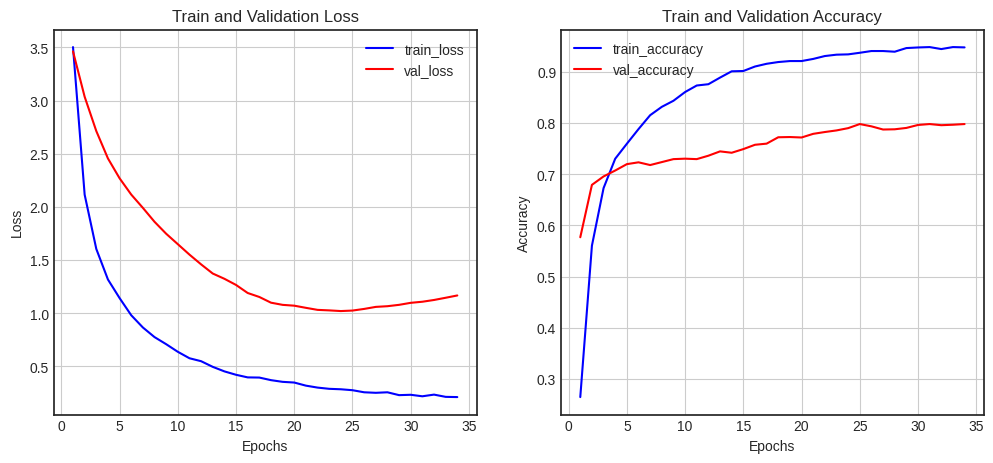

In [33]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [34]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 5ms/step - loss: 1.0209 - accuracy: 0.7903


## 10-4. CIFAR10 딥러닝 모델

## 데이터 로드 및 전처리

In [35]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [36]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
#20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 3s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [37]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


<ipython-input-38-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


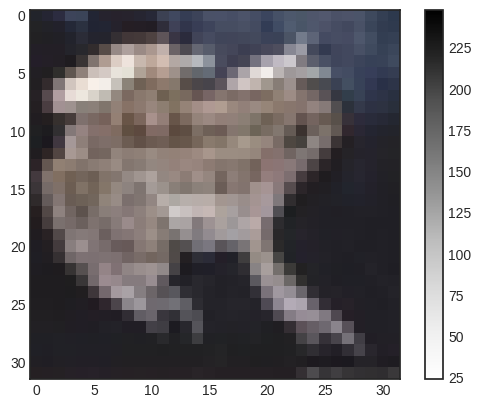

In [38]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [39]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [40]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape((40000, 32 * 32 * 3))
x_val = x_val.reshape((10000, 32 * 32 * 3))
x_test = x_test.reshape((10000, 32 * 32 * 3))


print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [41]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일

In [42]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(32 * 32 * 3,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [43]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 512)               1573376   
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_33 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 256)             

## 모델 학습

In [44]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
import tensorflow as tf
from tensorflow import keras

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#ModelCheckpoint 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [45]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping])

Epoch 1/100
625/625 [==============================] - 34s 50ms/step - loss: 2.2817 - accuracy: 0.2488 - val_loss: 1.8762 - val_accuracy: 0.3333
Epoch 2/100
  3/625 [..............................] - ETA: 20s - loss: 1.9162 - accuracy: 0.3229

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 22s 35ms/step - loss: 1.8840 - accuracy: 0.3185 - val_loss: 1.7718 - val_accuracy: 0.3588
Epoch 3/100
625/625 [==============================] - 22s 36ms/step - loss: 1.8281 - accuracy: 0.3417 - val_loss: 1.7540 - val_accuracy: 0.3567
Epoch 4/100
625/625 [==============================] - 22s 36ms/step - loss: 1.8118 - accuracy: 0.3480 - val_loss: 1.7076 - val_accuracy: 0.3878
Epoch 5/100
625/625 [==============================] - 23s 37ms/step - loss: 1.8146 - accuracy: 0.3472 - val_loss: 1.7093 - val_accuracy: 0.3750
Epoch 6/100
625/625 [==============================] - 22s 35ms/step - loss: 1.8073 - accuracy: 0.3505 - val_loss: 1.6983 - val_accuracy: 0.3826
Epoch 7/100
625/625 [==============================] - 21s 34ms/step - loss: 1.8133 - accuracy: 0.3495 - val_loss: 1.7736 - val_accuracy: 0.3642
Epoch 8/100
625/625 [==============================] - 22s 35ms/step - loss: 1.8118 - accuracy: 0.3487 - val_loss: 1.6942 - val_accuracy: 0.38

<ipython-input-46-a8a59d4010a8>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


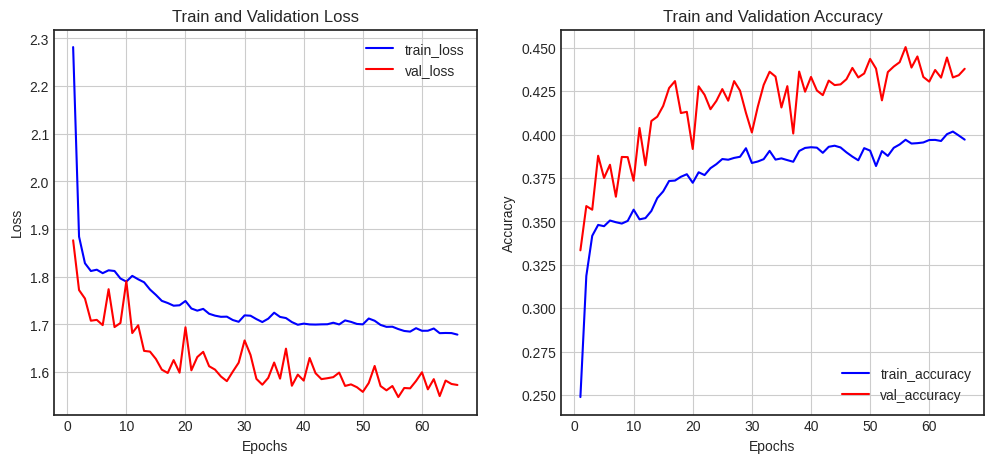

In [46]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [47]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.5612 - accuracy: 0.4378


[1.561187982559204, 0.43779999017715454]

# 또 다른 시도

## 1. 보스턴 주택가격 예측 - <케라스창시자에게 배우는 딥러닝> 참조

In [48]:
### 보스턴주택 데이터셋 로드

In [49]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [50]:
train_data.shape

(404, 13)

In [51]:
test_data.shape

(102, 13)

In [52]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## 데이터 준비

### 데이터 정규화

In [53]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

## 모델구성

### 모델 정의

In [54]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

###K-겹 검증을 사용한 훈련 검증

In [55]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np


k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [56]:
all_scores

[1.9054069519042969, 2.422816753387451, 2.604470729827881, 2.3812122344970703]

In [57]:
np.mean(all_scores)

2.328476667404175

###각 폴드의 검증 점수를 저장하기

In [58]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


###K-겹 검증 점수 평균을 기록하기

In [59]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

###검증 점수 그래프 그리기

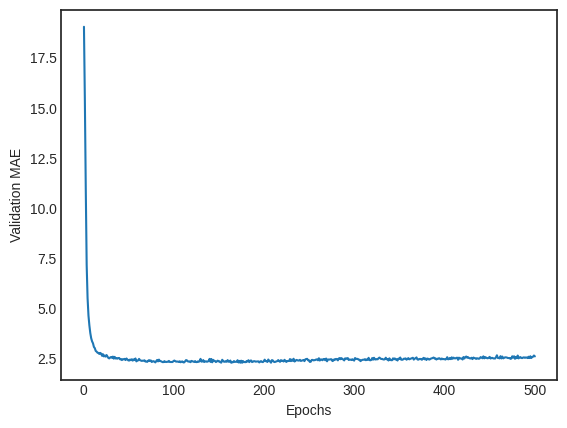

In [60]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

###처음 10개의 데이터 포인트를 제외한 검증 점수 그래프 그리기

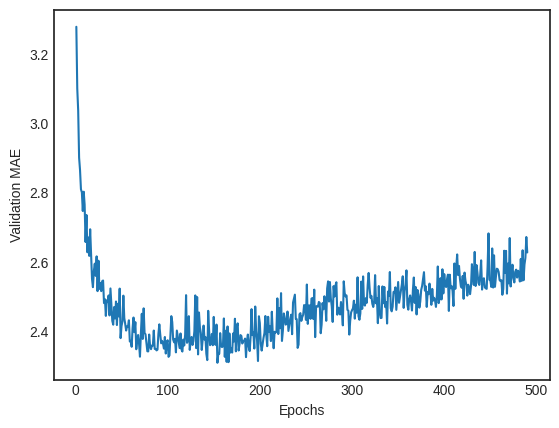

In [61]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### 최종 모델 훈련하기

In [62]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 17.1649 - mae: 2.5709


In [63]:
test_mae_score

2.5709266662597656

###새로운 데이터에 대해 예측하기

In [64]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([9.020406], dtype=float32)

---

####LMS 모델과 비교

# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

결과
4/4 [==============================] - 0s 3ms/step - loss: 23.4826

test_mae_score: 2.9865 // 새로운 런타임으로 3.0181779861450195

---

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

test_mae_score : 2.6581807136535645 // 새로운 런타임으로 2.5709266662597656

# 또 다른 시도 2

## 2. 로이터 데이터셋 : 뉴스 기사 분류: 다중 분류 문제 - <케라스창시자에게 배우는 딥러닝> 참조

### 로이터 데이터셋 로드

In [65]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [66]:
len(train_data)


8982

In [67]:
len(test_data)

2246

In [68]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

###로이터 데이터셋을 텍스트로 디코딩하기

In [72]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [73]:
train_labels[10]

3

### 데이터 준비

####데이터 인코딩하기

In [78]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

####레이블 인코딩하기

In [79]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [80]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

##모델 구성

###모델 정의하기

In [81]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

###모델 컴파일하기

In [82]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

##훈련 검증

### 검증 세트 준비하기

In [83]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

###모델 훈련하기

In [84]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 76ms/step - loss: 2.7666 - accuracy: 0.4748 - val_loss: 1.8747 - val_accuracy: 0.6110
Epoch 2/20
16/16 [==============================] - 1s 54ms/step - loss: 1.5651 - accuracy: 0.6680 - val_loss: 1.3956 - val_accuracy: 0.6900
Epoch 3/20
16/16 [==============================] - 1s 55ms/step - loss: 1.1904 - accuracy: 0.7393 - val_loss: 1.1965 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 1s 72ms/step - loss: 0.9739 - accuracy: 0.7919 - val_loss: 1.0794 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 1s 86ms/step - loss: 0.8076 - accuracy: 0.8251 - val_loss: 1.0033 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 62ms/step - loss: 0.6761 - accuracy: 0.8520 - val_loss: 0.9611 - val_accuracy: 0.7960
Epoch 7/20
16/16 [==============================] - 1s 52ms/step - loss: 0.5616 - accuracy: 0.8790 - val_loss: 0.9095 - val_accuracy: 0.8090
Epoch 8/20
16

###훈련과 검증 손실 그리기

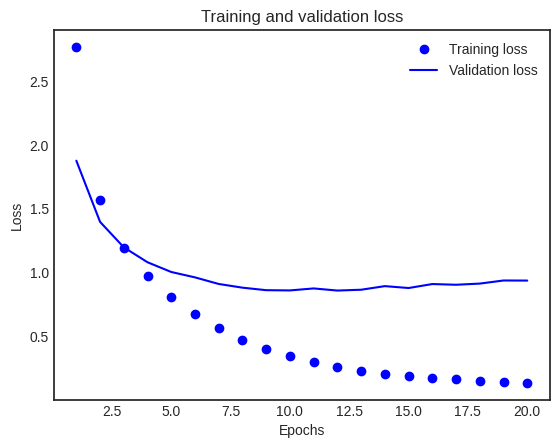

In [85]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

###훈련과 검증 정확도 그리기

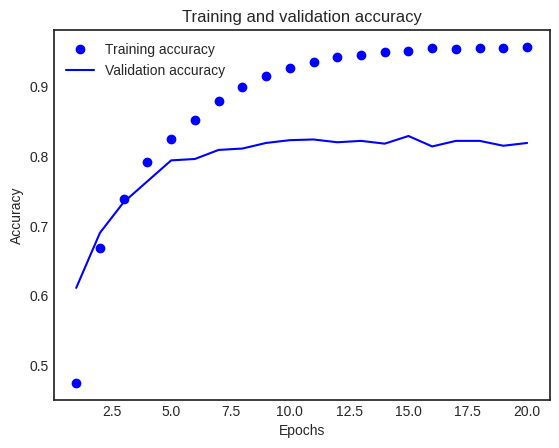

In [86]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

###모델을 처음부터 다시 훈련하기

In [87]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 48ms/step - loss: 2.6947 - accuracy: 0.5078
Epoch 2/9
18/18 [==============================] - 1s 45ms/step - loss: 1.5131 - accuracy: 0.6877
Epoch 3/9
18/18 [==============================] - 1s 44ms/step - loss: 1.1651 - accuracy: 0.7486
Epoch 4/9
18/18 [==============================] - 1s 41ms/step - loss: 0.9553 - accuracy: 0.7998
Epoch 5/9
18/18 [==============================] - 1s 42ms/step - loss: 0.7961 - accuracy: 0.8321
Epoch 6/9
18/18 [==============================] - 1s 41ms/step - loss: 0.6676 - accuracy: 0.8570
Epoch 7/9
18/18 [==============================] - 1s 42ms/step - loss: 0.5571 - accuracy: 0.8817
Epoch 8/9
18/18 [==============================] - 1s 57ms/step - loss: 0.4706 - accuracy: 0.9019
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9525 - accuracy: 0.7841


In [88]:
results

[0.9525047540664673, 0.784060537815094]

In [89]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()


0.18521816562778273

###새로운 데이터로 예측하기

In [90]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [91]:
predictions[0].shape

(46,)

In [92]:
np.sum(predictions[0])

1.0000001

In [93]:
np.argmax(predictions[0])

3

###레이블과 손실을 다루는 다른 방법

In [94]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [95]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

###충분히 큰 중간 층을 두어야 하는 이유
정보 병목이 있는 모델

In [96]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 3s 34ms/step - loss: 2.4736 - accuracy: 0.5089 - val_loss: 1.7655 - val_accuracy: 0.5720
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 1.5874 - accuracy: 0.6024 - val_loss: 1.5325 - val_accuracy: 0.6020
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 1.3679 - accuracy: 0.6260 - val_loss: 1.4270 - val_accuracy: 0.6450
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 1.2213 - accuracy: 0.6799 - val_loss: 1.3579 - val_accuracy: 0.6650
Epoch 5/20
63/63 [==============================] - 1s 22ms/step - loss: 1.1047 - accuracy: 0.7067 - val_loss: 1.3133 - val_accuracy: 0.6720
Epoch 6/20
63/63 [==============================] - 2s 26ms/step - loss: 1.0091 - accuracy: 0.7214 - val_loss: 1.2898 - val_accuracy: 0.6850
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 0.9296 - accuracy: 0.7432 - val_loss: 1.2851 - val_accuracy: 0.6910
Epoch 8/20
63

### 비교

### LMS 모델

```
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))
# 이전 코드 (모델 컴파일)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping 추가
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', # 검증 손실 기준 선택
    patience=10, # 중지까지 기다리는 에포크 매개변수
    restore_best_weights=True, # 가장 좋은 가중치 복원 여부 설정
    verbose=1 # 진행 사항 표시
)

# 모델 학습시 콜백 추가
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping]) # 콜백 추가

### 결과 : loss: 1.0209 - accuracy: 0.7903

```



## 소감


1. Boston 주택 가격 예측 / Reuters 데이터의 분류 / CIFAR10 데이터의 분류 프로젝트 완료하였으며 프로젝트의 지시 사항을 따라 데이터 전처리, 모델 구성, 모델학습을 진행하였습니다.
2. **보스턴 데이터셋 분류 모델**에서, LMS에서 제시하는 시퀀셜 모델구성이 아닌 함수형 모델구성을 <케라스창시자에게서 배우는 딥러닝>을 참조하여 다르게 구성해 보았습니다. 그러나 결과는 시퀀셜 구성이 더 좋은 성능을 보이는 듯 합니다.
3. **로이터 데이터셋 다중분류 모델**도 <케라스창시자에게서 배우는 딥러닝>을 참조하여 다르게 구성해 보았습니다만 결과는 썩 만족할 만한 것이 못되는 것 같습니다. 배운다는 느낌으로만 만족합니다.